## The Research Example in Chapter 8, Section 7: Handling Astronomical Images

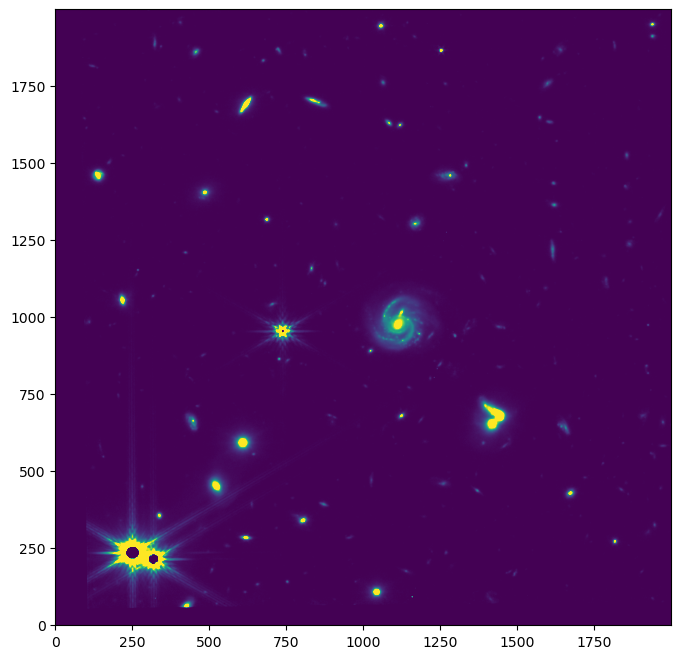

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# open the file
with fits.open('../../BookDatasets/HST_JWST/jwst_f277W_crop.fits') as hdu:
    image = hdu[0].data
    header = hdu[0].header

s = 5
vmin = np.median(image)
vmax = np.mean(image) - np.median(image) + s * np.std(image)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image, vmin=vmin, vmax=vmax, origin='lower');

#### Exercise 8.3 is in Problem Set 4

In [25]:
### Plate-Solving

from astropy.wcs import WCS

im_wcs = WCS(header)

Set OBSGEO-B to   -36.849188 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725785823.910 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


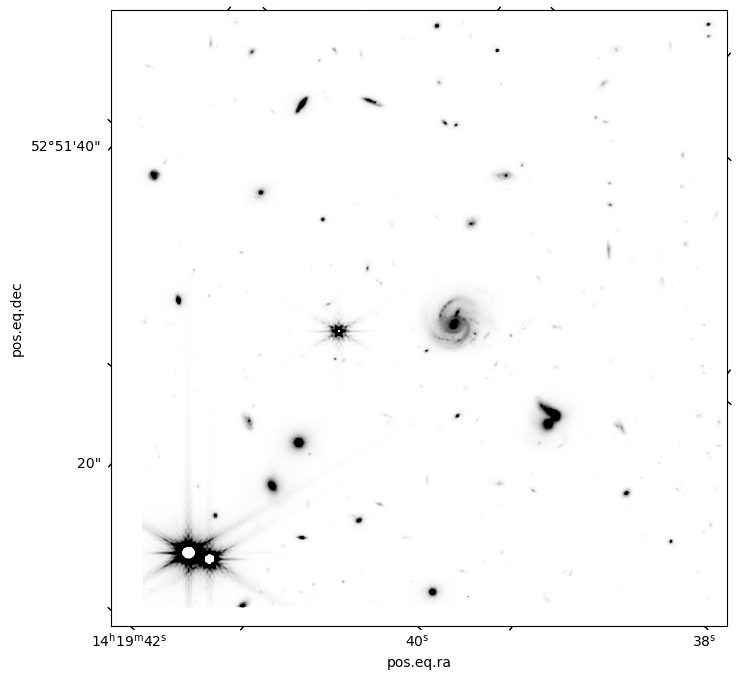

In [26]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': im_wcs})
ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r');

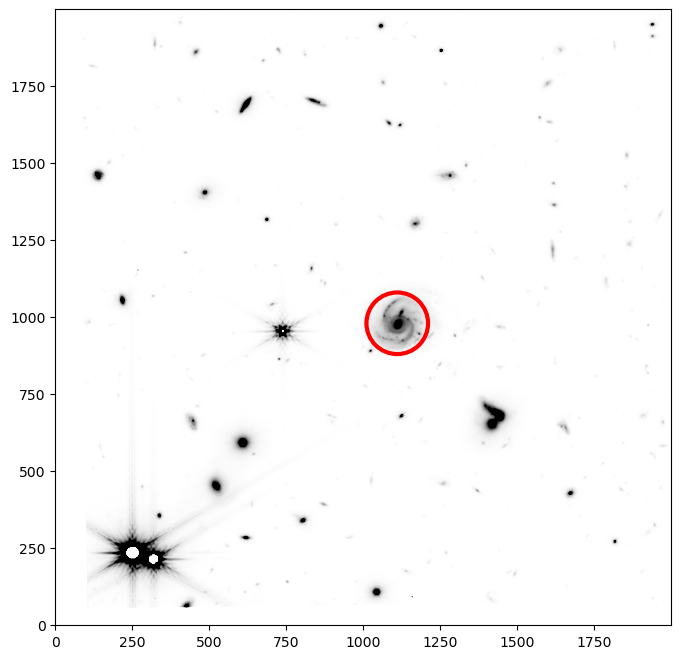

In [27]:
### Circular Aperture

from photutils.aperture import CircularAperture

# define pixel aperture
aperture = CircularAperture([1110, 980], r=100)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r', origin='lower')
aperture.plot(color='r', lw=3);

In [28]:
aperture.to_sky(im_wcs)

<SkyCircularAperture(<SkyCoord (ICRS): (ra, dec) in deg
    (214.9052996, 52.85095396)>, r=2.999998303351201 arcsec)>

In [29]:
coord = aperture.to_sky(im_wcs).positions
coord.to_string('hmsdms')

'14h19m37.27190414s +52d51m03.43427078s'

In [30]:
### Image Cutouts

from astropy.nddata import Cutout2D
import astropy.units as u

cutout = Cutout2D(data=image,
                  position=coord,
                  size=12*u.arcsec,
                  wcs=im_wcs)

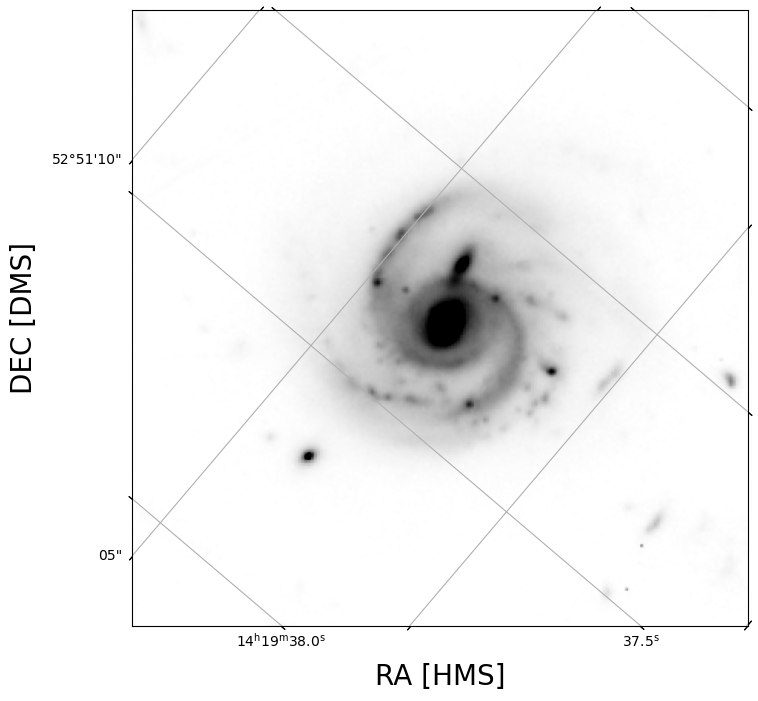

In [31]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':cutout.wcs})
ax.imshow(cutout.data, vmin=vmin, vmax=vmax, cmap='gray_r')
ax.set_xlabel('RA [HMS]', fontsize=20)
ax.set_ylabel('DEC [DMS]', fontsize=20)
ax.grid()

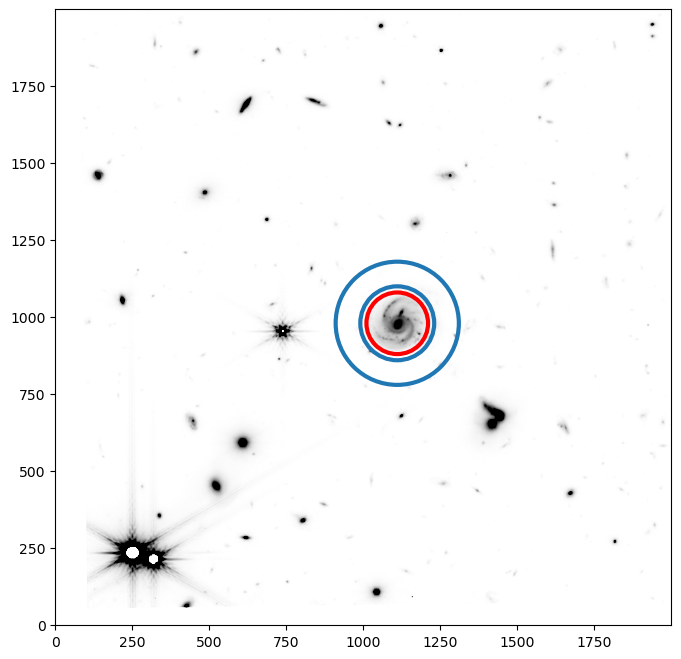

In [37]:
### Aperture Photometry

from photutils.aperture import CircularAnnulus

aperture = CircularAperture([1110, 980], r=100)
bg_aperture = CircularAnnulus([1110, 980], r_in=120, r_out=200)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r', origin='lower')
aperture.plot(color='r', lw=3)
bg_aperture.plot(color='C0', lw=3);